In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [11]:
DATA_PATH = "Indian"

In [12]:
# Get the list of directories
categories = sorted(os.listdir(DATA_PATH))
print(f"Categories: {categories}")

Categories: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [13]:
# Function to load images and labels using OpenCV
def load_images_and_labels(data_path, categories, img_size=(64, 64)):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(data_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(category)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(DATA_PATH, categories)

In [14]:

label_counts = pd.Series(labels).value_counts().sort_index()
fig = px.bar(label_counts, title="Distribution of Images per Class")
fig.show(renderer="browser")

In [15]:
# Encode labels
label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

In [16]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [17]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
datagen.fit(X_train)

In [19]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\ilakiya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [20]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=20)

Epoch 1/20


C:\Users\ilakiya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



1069/1069 ━━━━━━━━━━━━━━━━━━━━ 98s 89ms/step - accuracy: 0.5385 - loss: 1.5701 - val_accuracy: 0.9926 - val_loss: 0.0199
Epoch 2/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 99s 92ms/step - accuracy: 0.9576 - loss: 0.1303 - val_accuracy: 0.9947 - val_loss: 0.0129
Epoch 3/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 93s 87ms/step - accuracy: 0.9735 - loss: 0.0841 - val_accuracy: 0.9993 - val_loss: 0.0022
Epoch 4/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 93s 87ms/step - accuracy: 0.9797 - loss: 0.0587 - val_accuracy: 0.9989 - val_loss: 0.0030
Epoch 5/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 94s 88ms/step - accuracy: 0.9849 - loss: 0.0438 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 6/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 95s 88ms/step - accuracy: 0.9888 - loss: 0.0357 - val_accuracy: 0.9999 - val_loss: 0.0015
Epoch 7/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 94s 88ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9992 - val_loss: 0.0016
Epoch 8/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 97s 91ms/step - accuracy: 0.9908 - loss: 0.03

In [21]:
# Evaluate the model
y_pred = model.predict(X_test)
y_test_labels = label_binarizer.inverse_transform(y_test)
y_pred_labels = label_binarizer.inverse_transform(y_pred)

268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


In [24]:
# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=categories)

fig_cm = px.imshow(
    cm,
    x=categories,
    y=categories,
    title='Confusion Matrix',
    color_continuous_scale='Blues',
    text_auto=True
)

fig_cm.update_layout(
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

# Render in browser instead of inline (avoids nbformat requirement)
fig_cm.show(renderer="browser")

In [25]:
epochs = list(range(1, len(history.history['loss']) + 1))

fig_loss = px.line(
    x=epochs, 
    y=history.history['loss'], 
    labels={'x': 'Epoch', 'y': 'Loss'}, 
    title='Training Loss'
)
fig_loss.add_scatter(x=epochs, y=history.history['val_loss'], mode='lines', name='Validation Loss')
fig_loss.show(renderer="browser")

fig_acc = px.line(
    x=epochs, 
    y=history.history['accuracy'], 
    labels={'x': 'Epoch', 'y': 'Accuracy'}, 
    title='Training Accuracy'
)
fig_acc.add_scatter(x=epochs, y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy')
fig_acc.show(renderer="browser")


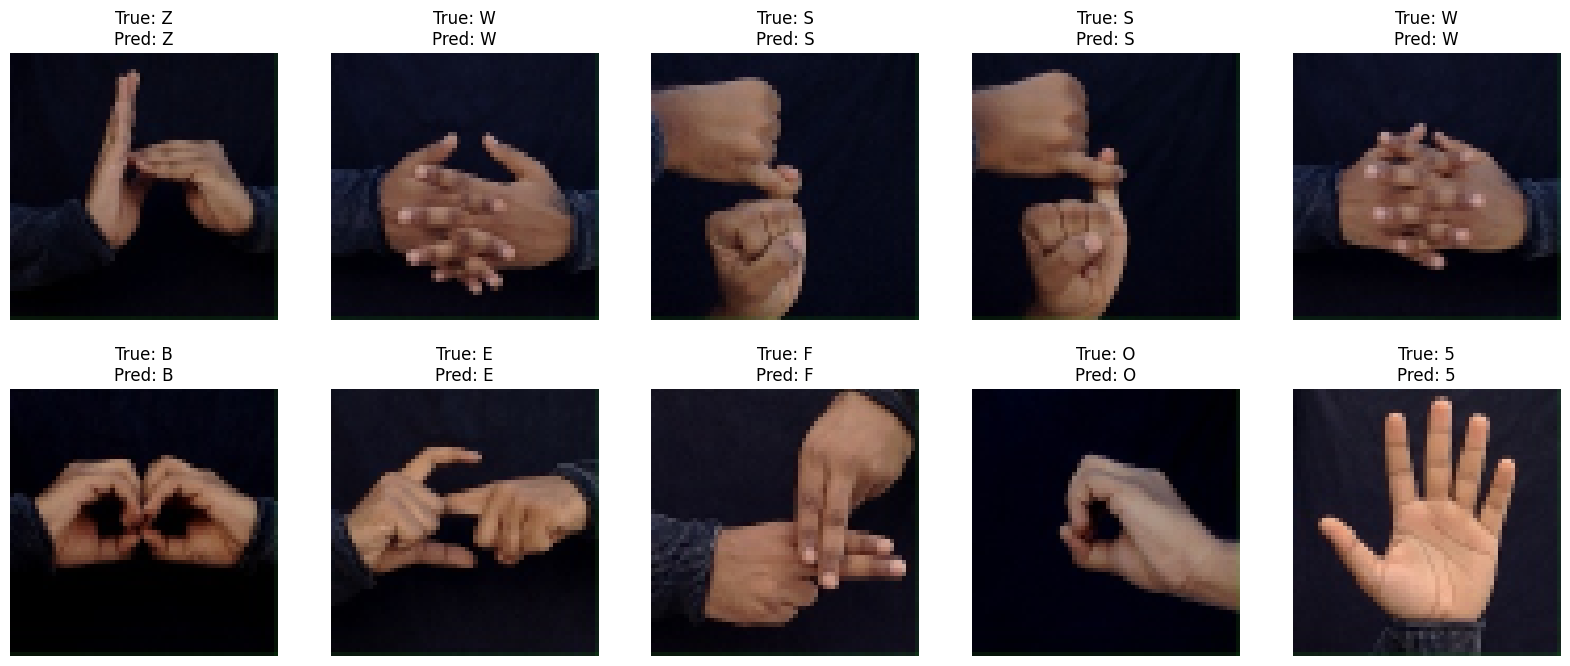

In [26]:
# Display 10 sample predictions
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    true_label = label_binarizer.inverse_transform(np.array([y_test[i]]))[0]
    pred_label = y_pred_labels[i]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.show()

In [27]:
# Save the model
model.save("sign_language_model.h5")

In [28]:
# Check for overfitting by comparing training and validation loss/accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

if val_loss[-1] > train_loss[-1] and val_acc[-1] < train_acc[-1]:
    print("The model might be overfitting. Consider using regularization techniques or early stopping.")
else:
    print("The model does not seem to be overfitting.")

The model does not seem to be overfitting.
